# Notebook 2: Explorar y visualizar datos de accidentes de bicicleta

Ahora que ya estan todos los datos (de 2009 a 2016) en una sola tabla, toca explorar los datos un poco mas y visualizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./Accidentes_limpio.csv")
df.head(5)

,DISTRITO_ACCIDENTE,COLISION_DOBLE,COLISION_MULTIPLE,CHOQUE_CON_OBJETO_FIJO,ATROPELLO,VUELCO,CAIDA_MOTOCICLETA,CAIDA_CICLOMOTOR,CAIDA_BICICLETA,CAIDA_VIAJERO_BUS,OTRAS_CAUSAS,AÑO
0,ARGANZUELA,389,54,126,75,9.0,43,9.0,4.0,5.0,8.0,2009
1,BARAJAS,89,6,53,21,NaN,12,2.0,1.0,2.0,2.0,2009
2,CARABANCHEL,375,44,171,137,8.0,36,13.0,6.0,9.0,8.0,2009
3,CENTRO,514,55,171,143,NaN,61,12.0,3.0,10.0,12.0,2009
4,CHAMARTIN,494,70,133,92,10.0,72,22.0,2.0,6.0,7.0,2009


## Agrupar

Lo primero, añado una columna con los totales (suma por filas), que puede ser util más adelante

In [5]:
df['TOTAL']=df.iloc[:,2:11].sum(axis=1, skipna = True)
df[['DISTRITO_ACCIDENTE', 'TOTAL']].head(5)

,DISTRITO_ACCIDENTE,TOTAL
0,ARGANZUELA,333.0
1,BARAJAS,99.0
2,CARABANCHEL,432.0
3,CENTRO,467.0
4,CHAMARTIN,414.0


Voy a hacer dos tablas agrupadas: una por año y otra por distrito

In [6]:
df_by_year = df.groupby('AÑO')
df_by_dist = df.loc[:, df.columns != "AÑO"].groupby('DISTRITO_ACCIDENTE') #seleccionando todo menos el año

In [6]:
df_by_year.mean()

,COLISION_DOBLE,COLISION_MULTIPLE,CHOQUE_CON_OBJETO_FIJO,ATROPELLO,VUELCO,CAIDA_MOTOCICLETA,CAIDA_CICLOMOTOR,CAIDA_BICICLETA,CAIDA_VIAJERO_BUS,OTRAS_CAUSAS
AÑO,,,,,,,,,,
2009,309.428571,37.619048,113.809524,75.333333,5.444444,36.571429,11.000000,3.800000,4.428571,6.380952
2010,291.333333,35.476190,96.952381,74.761905,5.238095,32.904762,9.894737,4.050000,5.833333,4.200000
2011,297.047619,36.952381,100.380952,74.571429,4.000000,38.238095,8.809524,6.000000,3.571429,3.263158
2012,293.809524,37.333333,94.000000,71.238095,4.600000,36.857143,8.904762,6.631579,4.312500,3.700000
2013,293.190476,34.428571,94.047619,70.761905,3.526316,44.142857,6.523810,6.666667,4.000000,3.210526
2014,288.380952,36.619048,95.095238,70.619048,4.947368,47.000000,7.142857,11.047619,4.684211,3.900000
2015,291.476190,35.047619,85.904762,72.619048,3.000000,46.809524,7.904762,11.380952,4.473684,3.150000
2016,298.000000,37.904762,93.571429,74.285714,4.166667,51.857143,10.095238,13.000000,4.428571,3.250000


In [43]:
df_by_year['TOTAL'].sum()

AÑO
2009    6162.0
2010    5610.0
2011    5765.0
2012    5576.0
2013    5592.0
2014    5879.0
2015    5661.0
2016    6128.0
Name: TOTAL, dtype: float64

In [9]:
total_by_year = df_by_year['TOTAL'].sum()
type(total_by_year)

pandas.core.series.Series

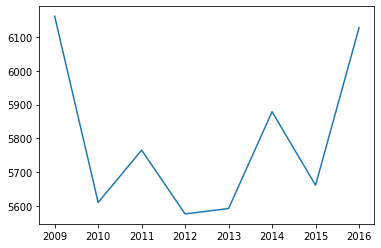

In [19]:
plt.plot(total_by_year)

In [18]:
mean = total_by_year.mean()
mean

5796.625

In [24]:
total_by_year.median()

5713.0

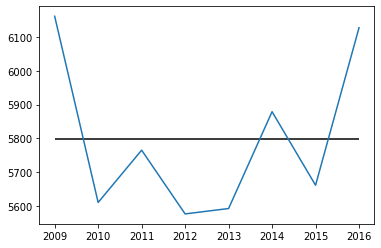

In [23]:
plt.plot(total_by_year)
plt.hlines(mean, 2009, 2016)

In [25]:
df_by_dist.mean()

,COLISION_DOBLE,COLISION_MULTIPLE,CHOQUE_CON_OBJETO_FIJO,ATROPELLO,VUELCO,CAIDA_MOTOCICLETA,CAIDA_CICLOMOTOR,CAIDA_BICICLETA,CAIDA_VIAJERO_BUS,OTRAS_CAUSAS,TOTAL
DISTRITO_ACCIDENTE,,,,,,,,,,,
ARGANZUELA,363.000,53.125,89.625,64.250,4.142857,44.375,9.500000,7.500000,5.250000,4.571429,281.250
BARAJAS,78.625,4.000,41.000,24.750,2.428571,10.500,3.000000,2.833333,2.000000,2.200000,89.750
CARABANCHEL,361.625,44.625,137.125,114.250,3.750000,36.250,10.625000,8.625000,7.000000,3.625000,365.875
CENTRO,492.125,41.625,153.375,141.125,2.166667,81.875,12.875000,16.375000,6.750000,7.000000,462.625
CHAMARTIN,480.125,66.750,122.375,82.625,7.125000,83.375,13.250000,5.625000,5.875000,6.000000,393.000
CHAMBERI,398.500,30.750,72.000,91.875,1.666667,70.500,11.125000,7.857143,3.500000,3.875000,291.125
CIUDAD LINEAL,392.250,59.375,126.500,91.875,6.375000,58.375,12.250000,6.250000,4.375000,4.500000,369.875
FUENCARRAL-EL PARDO,317.875,40.875,142.750,77.000,10.625000,38.500,10.625000,15.000000,3.000000,3.875000,342.250
HORTALEZA,198.125,17.875,84.750,53.125,3.375000,27.500,9.375000,8.125000,2.375000,2.250000,208.750


In [32]:
total_mean_by_dist = df_by_dist['TOTAL'].mean()
total_mean_by_dist.sort_values(ascending=True)

DISTRITO_ACCIDENTE
BARAJAS                            89.750
VICALVARO                          91.875
VILLA DE VALLECAS                 127.375
MORATALAZ                         149.125
VILLAVERDE                        151.375
USERA                             199.125
HORTALEZA                         208.750
SAN BLAS                          220.000
RETIRO                            263.375
ARGANZUELA                        281.250
TETUAN                            288.875
CHAMBERI                          291.125
LATINA                            302.375
FUENCARRAL-EL PARDO               342.250
CARABANCHEL                       365.875
CIUDAD LINEAL                     369.875
PUENTE DE VALLECAS                382.500
CHAMARTIN                         393.000
MONCLOA-ARAVACA                   395.125
SALAMANCA                         421.000
CENTRO                            462.625
Name: TOTAL, dtype: float64

In [37]:
total_mean_by_dist.sort_values(ascending=True).values

array([ 89.75 ,  91.875, 127.375, 149.125, 151.375, 199.125, 208.75 ,
       220.   , 263.375, 281.25 , 288.875, 291.125, 302.375, 342.25 ,
       365.875, 369.875, 382.5  , 393.   , 395.125, 421.   , 462.625])

<BarContainer object of 21 artists>

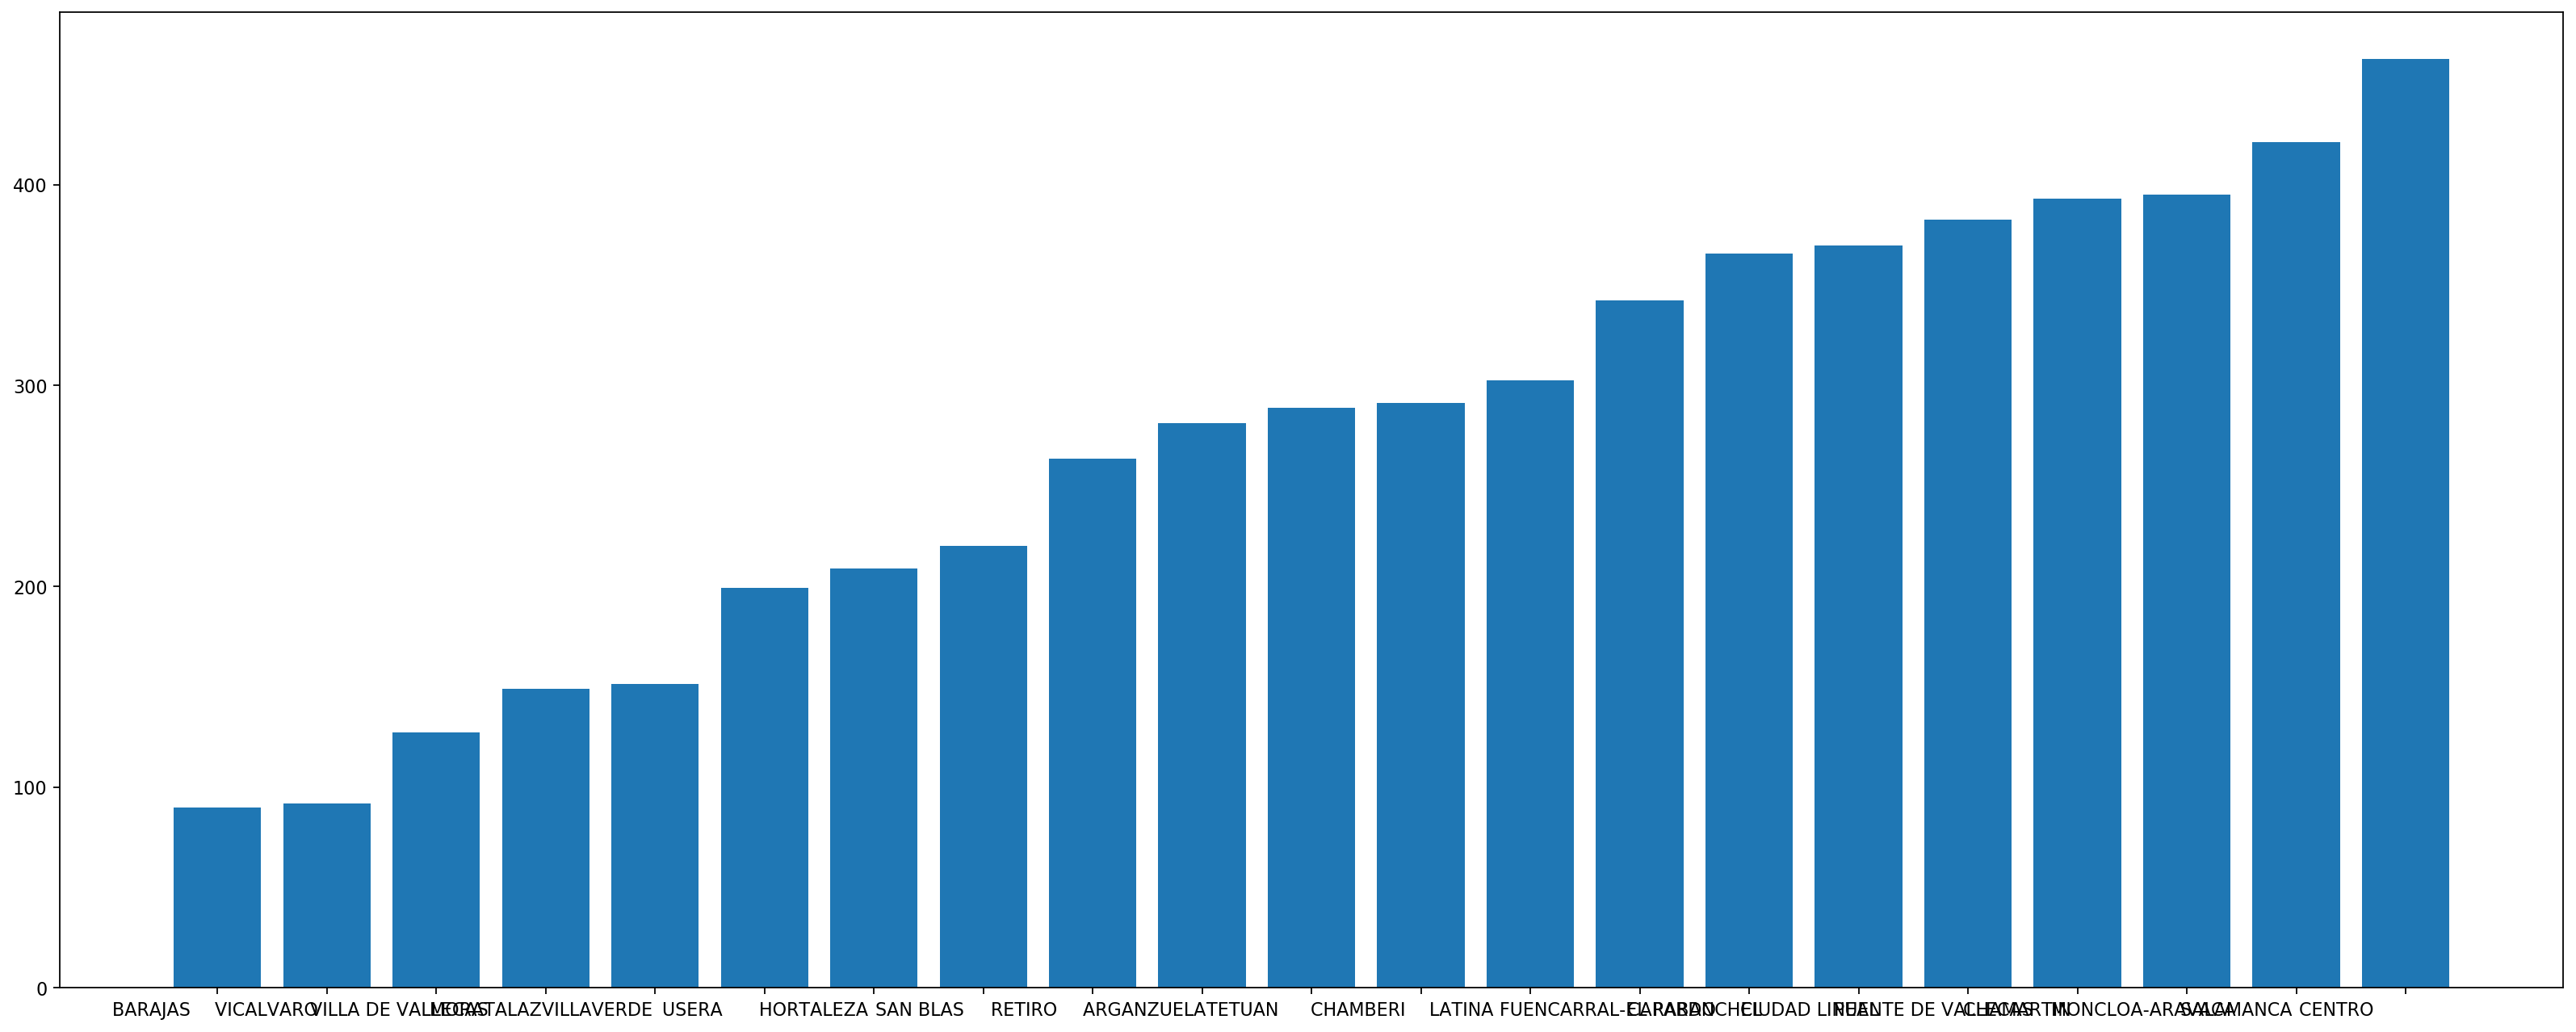

In [44]:
fig=plt.figure(figsize=(25, 10), dpi= 160, facecolor='w', edgecolor='k')
plt.bar(total_mean_by_dist.sort_values(ascending=True).index, total_mean_by_dist.sort_values(ascending=True).values)

<font color=red> **RECORDATORIO:** </font> hay que mirar como plotear esto en condiciones